In [38]:

from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import random
import glob
import cv2

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib

In [40]:
pd.set_option("display.precision", 8)

In [41]:
path='/content/drive/MyDrive/DLdata/Pizza'

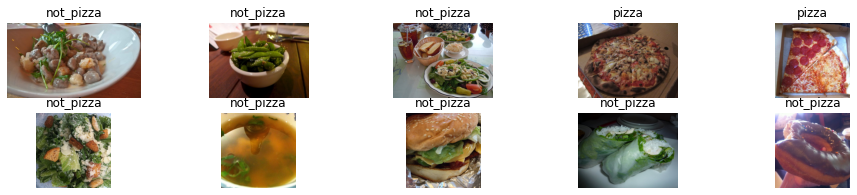

In [42]:
classes=os.listdir(path)

plt.figure(figsize=(16,8))

for x in range(10):
    i=random.randint(0,1)
    images=os.listdir(path+'/'+classes[i])
    j=random.randint(0,900)
    image=cv2.imread(path+'/'+classes[i]+'/'+images[j])
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    ax=plt.subplot(5,5,x+1)
    plt.imshow(image)
    plt.title(classes[i])
    plt.axis("off")
    
    
plt.show()

In [43]:
from keras.preprocessing.image import ImageDataGenerator

In [44]:
data_dir = pathlib.Path(path)

In [45]:
batch_size = 32
img_height = 180
img_width = 180

In [46]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1976 files belonging to 2 classes.
Using 1581 files for training.


In [47]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1976 files belonging to 2 classes.
Using 395 files for validation.


In [48]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [49]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1600).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [50]:
normalization_layer = layers.Rescaling(1./255)

In [51]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [53]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2)
])

In [54]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [56]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
50/50 [==============================] - 74s 1s/step - loss: 0.6568 - accuracy: 0.6256 - val_loss: 0.5925 - val_accuracy: 0.6835
Epoch 2/10
50/50 [==============================] - 48s 966ms/step - loss: 0.5107 - accuracy: 0.7476 - val_loss: 0.5392 - val_accuracy: 0.7418
Epoch 3/10
50/50 [==============================] - 50s 1s/step - loss: 0.4117 - accuracy: 0.8248 - val_loss: 0.5235 - val_accuracy: 0.7722
Epoch 4/10
50/50 [==============================] - 48s 965ms/step - loss: 0.3713 - accuracy: 0.8267 - val_loss: 0.5164 - val_accuracy: 0.7722
Epoch 5/10
50/50 [==============================] - 50s 1s/step - loss: 0.2806 - accuracy: 0.8811 - val_loss: 0.6702 - val_accuracy: 0.6962
Epoch 6/10
50/50 [==============================] - 48s 968ms/step - loss: 0.2367 - accuracy: 0.9051 - val_loss: 0.6080 - val_accuracy: 0.7696
Epoch 7/10
50/50 [==============================] - 49s 972ms/step - loss: 0.1840 - accuracy: 0.9159 - val_loss: 0.6797 - val_accuracy: 0.7468
Epoch 8/

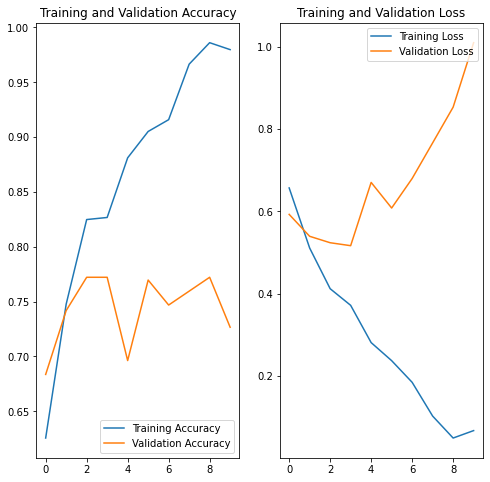

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
Data Augmentation

In [58]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

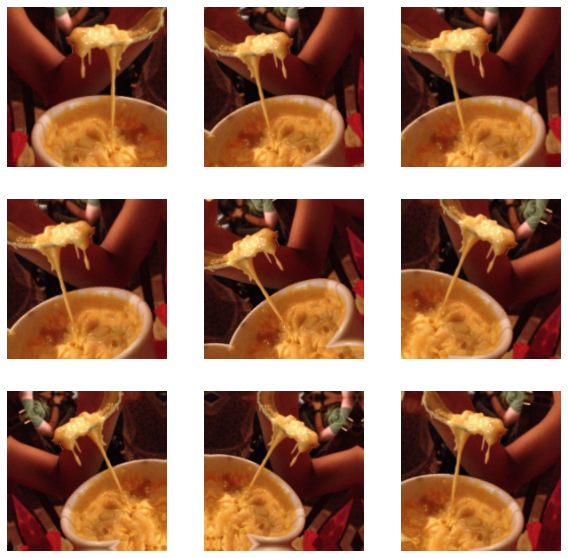

In [59]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [60]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2)
])

In [61]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [62]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
50/50 [==============================] - 59s 1s/step - loss: 0.7564 - accuracy: 0.5560 - val_loss: 0.6426 - val_accuracy: 0.6253
Epoch 2/10
50/50 [==============================] - 56s 1s/step - loss: 0.6062 - accuracy: 0.6781 - val_loss: 0.5928 - val_accuracy: 0.6861
Epoch 3/10
50/50 [==============================] - 58s 1s/step - loss: 0.5568 - accuracy: 0.7242 - val_loss: 0.5797 - val_accuracy: 0.7165
Epoch 4/10
50/50 [==============================] - 56s 1s/step - loss: 0.5211 - accuracy: 0.7470 - val_loss: 0.5458 - val_accuracy: 0.7165
Epoch 5/10
50/50 [==============================] - 58s 1s/step - loss: 0.4890 - accuracy: 0.7653 - val_loss: 0.5370 - val_accuracy: 0.7215
Epoch 6/10
50/50 [==============================] - 56s 1s/step - loss: 0.4842 - accuracy: 0.7704 - val_loss: 0.5609 - val_accuracy: 0.7038
Epoch 7/10
50/50 [==============================] - 58s 1s/step - loss: 0.4931 - accuracy: 0.7622 - val_loss: 0.5862 - val_accuracy: 0.7038
Epoch 8/10
50/50 [==

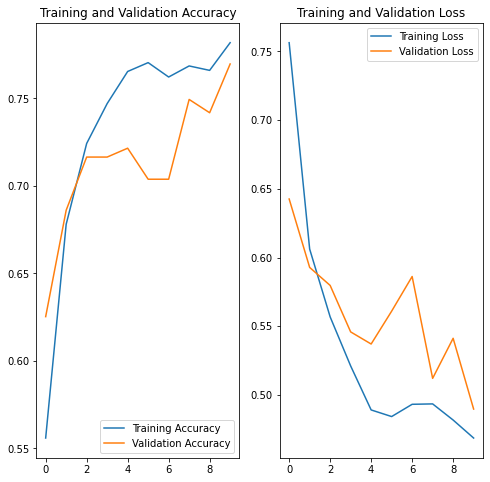

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()